# Линейная алгебра. Лабораторная работа 1, зима 2021, пилотный поток

В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [1]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных &mdash; это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [2]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`.

*Умножение матриц* производится с помощью оператора `np.dot()`. Есть два варианта написания: `A.dot(B)` и `np.dot(A, B)`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` &mdash; это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` &mdash; это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` &mdash; это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

**И всё-таки задание**

В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

А сейчас мы в качестве примера создадим единичную матрицу:

In [3]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [4]:
Z = np.zeros((3, 4))
print(Z)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [5]:
M = np.diag([1, 2, 3, 4, 5])
print(M)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [6]:
print(M.trace())

15


In [7]:
print(sla.inv(M))

[[ 1.          0.         -0.          0.         -0.        ]
 [ 0.          0.5        -0.          0.         -0.        ]
 [ 0.          0.          0.33333333  0.         -0.        ]
 [ 0.          0.          0.          0.25       -0.        ]
 [ 0.          0.          0.          0.          0.2       ]]


In [8]:
X = np.random.rand(4, 5)
print(X)

[[0.1634591  0.81101804 0.75558448 0.43313686 0.4474486 ]
 [0.59572381 0.74132068 0.7499175  0.23309124 0.21485208]
 [0.04182631 0.67515324 0.43627643 0.39451419 0.32357922]
 [0.70567793 0.9533307  0.38420192 0.78855057 0.03532457]]


In [9]:
print(sla.det(X[np.ix_([1, 2], [0, 1])]))

0.37119815577172854


In [10]:
print(np.dot(X.T, X))

[[0.88133652 1.27517426 0.85962152 0.78262197 0.23959394]
 [1.27517426 2.57197792 1.82954692 1.54218416 0.77430473]
 [0.85962152 1.82954692 1.4712324  0.97715058 0.65394831]
 [0.78262197 1.54218416 0.97715058 1.01939252 0.39939842]
 [0.23959394 0.77430473 0.65394831 0.39939842 0.352323  ]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [11]:
def my_det(X):
    '''
    Parameters
    ----------
    X : array_like
    
    Returns
    -------
    det : float
        Determinant of `a`.
    '''
    if X.shape[0] != X.shape[1]:
        raise ValueError
    Y = X.copy()
    det = 1
    cnt = 0
    for j in range(Y.shape[1]):
        for i in range(cnt, Y.shape[0]):
            if Y[i][j] != 0:
                if i != cnt:
                    det *= -1
                    Y[[cnt, i]] = Y[[i, cnt]]
                det *= Y[cnt][j]
                Y[cnt] = Y[cnt] / Y[cnt][j]
                for k in range(cnt + 1, X.shape[0]):
                    Y[k] = Y[k] - Y[cnt] * Y[k][j]
                cnt += 1
    return det

Простая проверка:

In [12]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(X)
print(my_det(X))

[[0 0 1]
 [0 1 0]
 [1 0 0]]
-1


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [13]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8,8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

The slowest run took 272.64 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 14.8 µs per loop
The slowest run took 8.30 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 244 µs per loop
The slowest run took 11.38 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 524 µs per loop
10 loops, best of 5: 47.4 ms per loop
10 loops, best of 5: 72.4 ms per loop


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in double_scalars


1 loop, best of 5: 2.64 s per loop


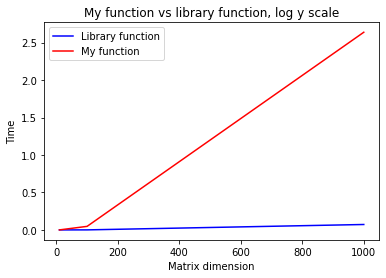

In [14]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

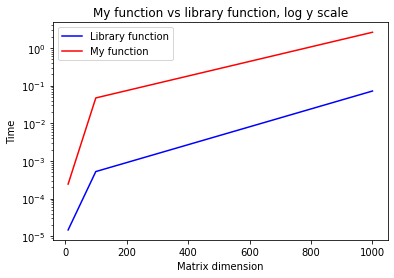

In [15]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [16]:
print(np.dot(np.array([[1, 0], [10**20, 1]]), np.array([[10**(-20), 1], [0, 1 - 10**20]])))

[[1e-20 1]
 [1.0 1]]


In [17]:
print(np.dot(np.array([[1., 0.], [10.**20, 1.]]), np.array([[10.**(-20), 1.], [0., 1. - 10.**20]])))

[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
**Напишите здесь свой ответ**

Первый

Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [18]:
def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    P = np.zeros((2 * dim, 2 * dim))
    for sum in range(2 * dim - 1):
        P[0][sum] = P[sum][0] = 1
        for i in range(1, sum):
            P[i][sum - i] = P[i - 1][sum - i] + P[i][sum - i - 1]
    return P[np.ix_(list(range(dim)), list(range(dim)))]

Чему равен её определитель? Обязательно объясните свой ответ.

----
**Ваше решение**

Определитель матрицы Паскаля любого размера равен $1$. Покажем это следующим алгоритмом. На $i$-ом шаге будем вычитать из n-ой строки $(n - 1)$-ую, затем из $(n - 1)$-ой $(n - 2)$-ую и т.д., в конце вычтем из $(i + 1)$-ой $i$-ую. Посмотрим, что произойдет на $1$-ом шаге. По свойству биномиальных коэффициентов $C_n^k=C_{n-1}^k+C_{n-1}^{k-1}$ после таких вычитаний все элементы, кроме тех, что стоят на первой строке, приобретут значения, которые имели элементы, стоящие слева от них. Другими словами, строки со $2$-ой по $n$-ую сдвинутся вправо и дополнятся слева ноликами. При этом, такой сдвиг сохранит свойство биномиальных коэффициентов для этих строк, поэтому на следующих шагах алгоритм также корректен. Из алгоритма видно, что в конце получится верхнетреугольная матрица с единицами на диагонали и ее определитель равен $1$. Так как мы делали только преобразования строк, которые не меняют определитель (прибавление одной строки, домноженной на коэффициент, к другой), то определитель исходной матрицы также равен $1$.

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [19]:
print(sla.det(my_pascal(30)))

4.6365440194083456e+47


Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [20]:
def prod_and_sq_sum(A):
    return np.prod(A.diagonal()), np.sum(np.square(A.diagonal()))

**Задание 4.2** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы. Напишите функцию `f(A, B, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,m)}a_ib_i^T$$

In [21]:
# Странно, что min(k, m), а не min(k, n), ведь всего столбцов n
def f(A, B, k):
    m, n = A.shape[0], A.shape[1]
    return np.sum(np.matmul(A.T.reshape(n, m, 1), 
                            B.T.reshape(n, 1, m)).reshape(n, m, m)[:min(k, m)],
                  axis=0)

**Задание 4.3** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [22]:
def get_diag(A, B):
    n = A.shape[0]
    return np.matmul(A.reshape(n, 1, n), B.T.reshape(n, n, 1)).reshape(n)

## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

**Внимание!** При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Решения, в которых в какой-либо момент работа происходит не с комплексным числом как таковым, а с парой вещественных, будут оцениваться нулём баллов. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [23]:
def shrink_rotate(x, a, coef=1., angle=0.):
    v = x - a
    v *= coef * (np.cos(angle) + np.sin(angle) * 1j)
    return a + v
    
def shrink_rotate_conj(x, a, coef=1., angle=0.):
    return a + (shrink_rotate(x, a, coef, angle) - a).conjugate()
    
def geometric_inverse(x, a, r):
    return a + r ** 2 / (x - a).conjugate()

**Задание 5.4** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

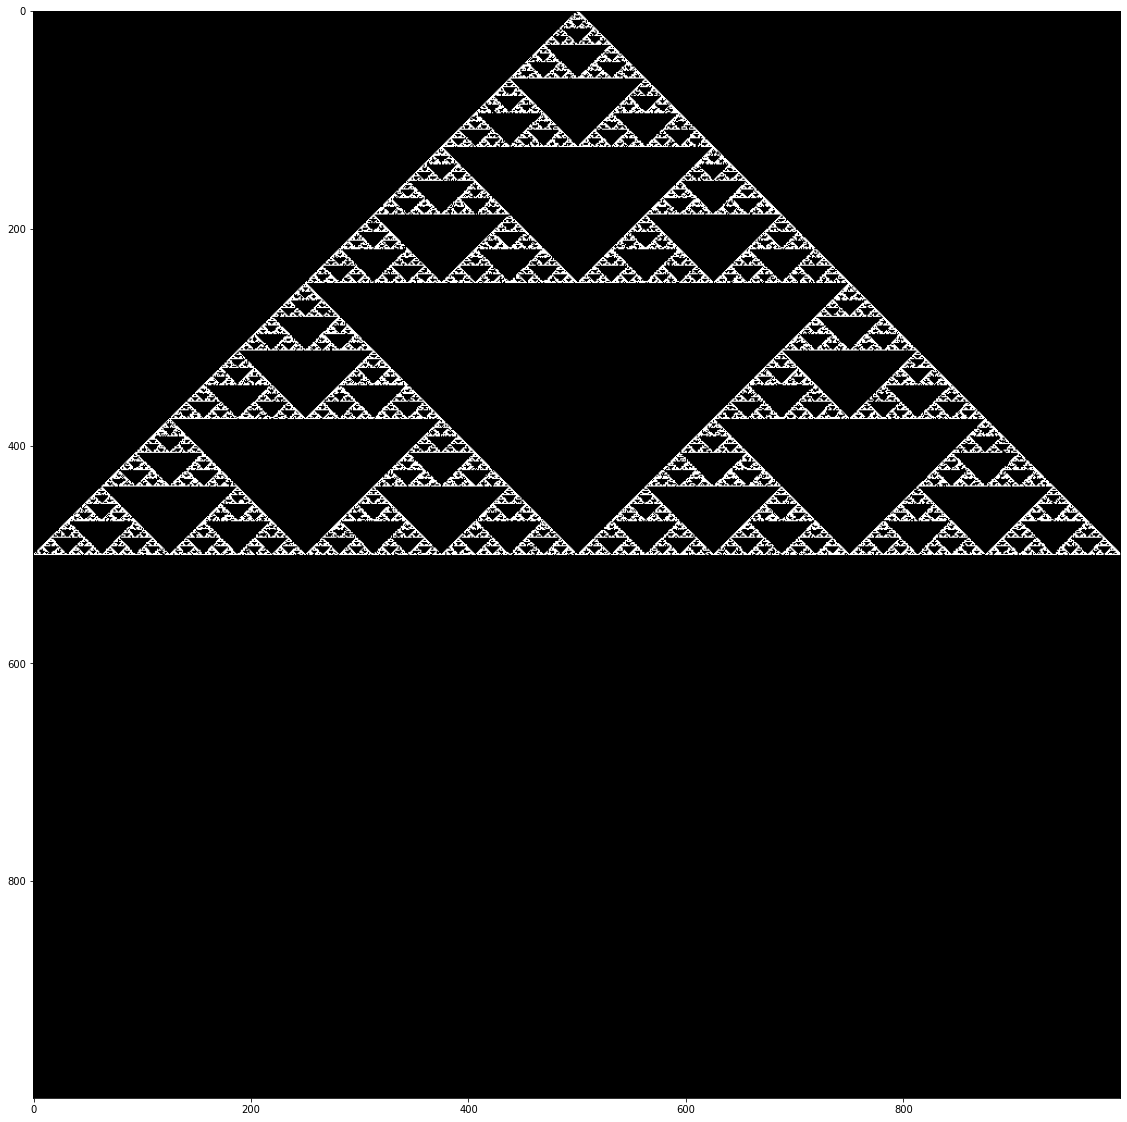

In [24]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

image = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 10:
        x, y = 500 - round(500 * z.imag), 500 - round(500 * z.real)
        if 0 <= min(x, y) and max(x, y) < 1000:
            image[x][y] = 1
plt.figure(figsize=(20, 20))
plt.imshow(image, cmap='gray')

**Задание 5.5 (со звёздочкой)** Попробуйте объяснить, почему получается именно эта фигура.

---
Ваше объяснение

**Задание 5.6** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

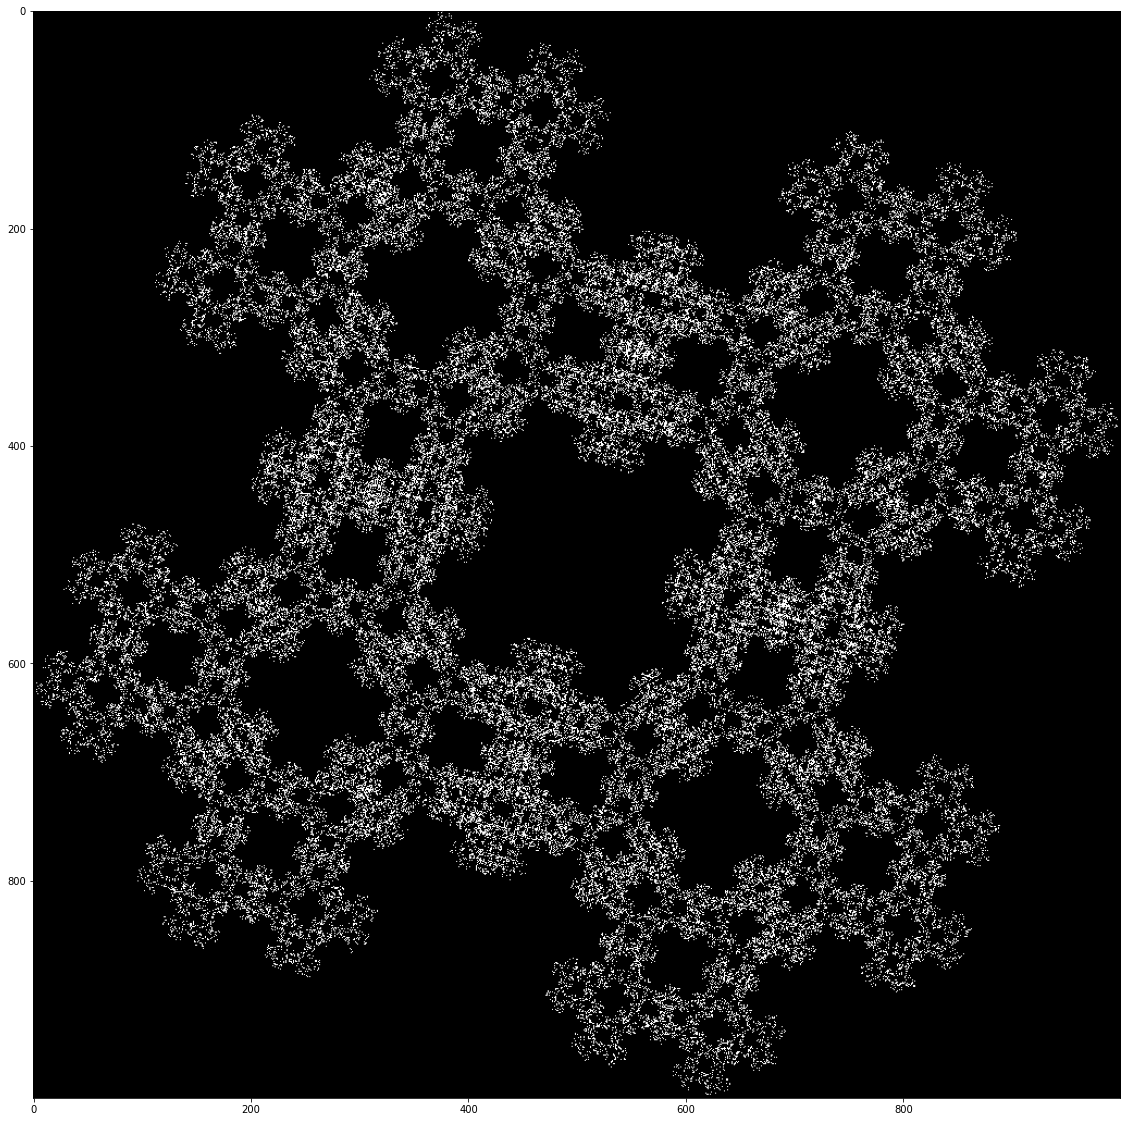

In [25]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 0.75*1j, coef=0.5, angle=np.pi / 4)),
    (lambda t: shrink_rotate(t, 0.75 + 0.*1j, coef=0.5, angle=np.pi / 4)),
    (lambda t: shrink_rotate(t, -0.75 + 0.*1j, coef=0.5, angle=np.pi / 4)),
    (lambda t: shrink_rotate(t, 0. - 0.75*1j, coef=0.5, angle=np.pi / 4))
]

image = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 10:
        x, y = 500 - round(500 * z.imag), 500 - round(500 * z.real)
        if 0 <= min(x, y) and max(x, y) < 1000:
            image[x][y] = 1
plt.figure(figsize=(20, 20))
plt.imshow(image, cmap='gray')

## Часть 6. Функции от матриц

Пусть $A$ -- некоторая квадратная матрица. В некоторых приложениях возникает необходимость вычислить какую-нибудь сложную функцию от матрицы. Например, экспоненту или синус. Это можно делать с помощью разложения в ряд, но мы пойдем другим путем. В этой задаче мы продемонстрируем другой метод:

1) Посчитаем какой-нибудь аннулирующий многочлен для матрицы $A$. Пусть это будет $f(x)$.

2) Разложим многочлен $f$ на множители следующим образом $f(x) = (x-\lambda_1)^{k_1}\ldots (x-\lambda_r)^{k_r}$.

3) Пусть $\phi$ -- гладкая функция, значение которой мы хотим посчитать на матрице $A$. Найдем какой-нибудь многочлен $g_\phi$ степени меньше, чем степень $f$ со следующими свойствами: $g_\phi(\lambda_i)^{(d)} = \phi^{(d)}(\lambda_i)$ для всех $0 \leqslant d < k_i$. То есть во всех корнях $f$ все производные $g_\phi$ до кратности корня должны совпасть с производными $\phi$.

4) Утверждается, что $\phi(A) = g_\phi(A)$ (и в частности не зависит от выбора многочлена $g_\phi$ с указанными свойствами).

**А теперь задание**

Каждая группа будет работать со своей матрицей:

- у группы 211:

`A = np.array([[-1,1,2,-2],[-5,4,3,-4],[0,0,2,-1],[1,0,-1,1]])`

- у группы 212:

`A = np.array([[-3,5,-5,-7],[-10,12,-9,-15],[5,-2,-2,1],[-9,7,-2,-7]])`

- у группы 214:

`A = np.array([[-6,-4,3,6],[1,-3,0,-1],[-1,-1,-5,0],[1,1,1,-4]])`

 

Посчитайте указанным способом:
 

1) $B = e^A$.
 
2) $S = \sin A$.

3) $T = \cos A$.

4) Проверьте равенство $S^2 + T^2 = E$, то есть $\sin^2 A + \cos^2 A = E$.

5) $\ln (B)$ и проверьте, что полученная матрица совпадает с $A$.

 

In [26]:
# Вычислим хар. многочлен
A = np.array([[-6.,-4.,3.,6.],[1.,-3.,0.,-1.],[-1.,-1.,-5.,0.],[1.,1.,1.,-4.]])
np.roots(np.poly(A))


array([-5.00000069, -4.99999931, -4.0000006 , -3.9999994 ])

$f(x) = (x + 4)^2(x + 5)^2$

In [27]:
# Матрица коэффициентов при коэффициентах многочлена g при подстановке 
# -4 и -5 в многочлен и его первую производную
coefs = np.array([[-64., 16., -4., 1.],
                  [48., -8., 1., 0.],
                  [-125., 25., -5., 1.],
                  [75., -10., 1., 0.]])

In [28]:
from numpy.linalg import matrix_power

In [29]:
# 1
g1 = sla.solve(coefs, np.array([np.e ** (-4.), np.e ** (-4.), 
                                np.e ** (-5.), np.e ** (-5.)]))
B = g1[0] * matrix_power(A, 3) + g1[1] * matrix_power(A, 2) + \
    g1[2] * matrix_power(A, 1) + g1[3] * np.eye(4)
print(B)

[[ 1.11022302e-16 -3.17915329e-02  3.66312778e-02  6.16848637e-02]
 [ 6.73794700e-03  1.53740961e-02  1.15776919e-02  9.67948978e-03]
 [-6.73794700e-03  2.94154278e-03 -1.15776919e-02 -2.79951287e-02]
 [ 6.73794700e-03 -2.94154278e-03  2.98933308e-02  4.63107676e-02]]


In [30]:
# 2
g2 = sla.solve(coefs, np.array([np.sin(-4.), np.cos(-4.), 
                                np.sin(-5.), np.cos(-5.)]))
S = g2[0] * matrix_power(A, 3) + g2[1] * matrix_power(A, 2) + \
    g2[2] * matrix_power(A, 1) + g2[3] * np.eye(4)
print(S)

[[ 0.67526209 -0.64886478 -0.57210321 -0.20690062]
 [ 0.28366219  2.01203261 -0.93730581 -1.70675196]
 [-0.28366219 -1.25523012  2.34775192  2.36039558]
 [ 0.28366219  1.25523012 -1.59094943 -1.60359308]]


In [31]:
# 3
g3 = sla.solve(coefs, np.array([np.cos(-4.), -np.sin(-4.), 
                                np.cos(-5.), -np.sin(-5.)]))
T = g3[0] * matrix_power(A, 3) + g3[1] * matrix_power(A, 2) + \
    g3[2] * matrix_power(A, 1) + g3[3] * np.eye(4)
print(T)

[[ 1.24258646  3.81407863 -2.65303258 -5.50818693]
 [-0.95892427 -1.65580483  0.20212178  1.18266452]
 [ 0.95892427  1.00216121 -0.0989629  -0.42586203]
 [-0.95892427 -1.00216121 -0.55468072 -0.22778159]]


In [32]:
# 4
print(np.dot(S, S) + np.dot(T, T))

[[ 1.00000000e+00  6.72795153e-14 -1.87627691e-14 -1.04770359e-13]
 [-1.12132525e-14  1.00000000e+00 -1.55431223e-15  1.28785871e-14]
 [ 9.10382880e-15 -5.32907052e-15  1.00000000e+00 -1.06581410e-14]
 [-1.40998324e-14  8.88178420e-16  4.44089210e-16  1.00000000e+00]]


Получившаяся выше матрица в действительности равна $E$ c высокой точностью

In [33]:
# 5
# Найдем хар. многочлен
np.roots(np.poly(B))

array([0.01831564+7.22067761e-10j, 0.01831564-7.22067761e-10j,
       0.00673794+0.00000000e+00j, 0.00673795+0.00000000e+00j])

Можно понять, что получившиеся числа - это $e^{-4}$ и $e^{-5}$. Получаем, что $f(x)=(x+e^{-4})^2(x+e^{-5})^2$


In [34]:
# Матрица коэффициентов при коэффициентах многочлена g при подстановке 
# e^(-4) и e^(-5) в многочлен и его первую производную
coefs_2 = np.array([[np.e ** (-12.), np.e ** (-8.), np.e ** (-4.), 1.],
                    [3. * np.e ** (-8.), 2. * np.e ** (-4.), 1., 0.],
                    [np.e ** (-15.), np.e ** (-10.), np.e ** (-5.), 1.],
                    [3. * np.e ** (-10.), 2. * np.e ** (-5.), 1., 0.]])


In [35]:
g5 = sla.solve(coefs_2, np.array([-4., np.e ** 4., 
                                  -5., np.e ** 5.]))
A2 = g5[0] * matrix_power(B, 3) + g5[1] * matrix_power(B, 2) + \
     g5[2] * matrix_power(B, 1) + g5[3] * np.eye(4)
print(A2)

[[-6.00000000e+00 -4.00000000e+00  3.00000000e+00  6.00000000e+00]
 [ 1.00000000e+00 -3.00000000e+00  3.01980663e-14 -1.00000000e+00]
 [-1.00000000e+00 -1.00000000e+00 -5.00000000e+00 -3.37507799e-14]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 -4.00000000e+00]]


Получившаяся выше матрица в действительности равна $A$ с высокой точностью

Теперь попробуем поиграться с матрицами по-другому.

1) Возьмите матрицу $A$ из предыдущего задания и посчитайте $e^A$ с помощью подстановки в следующий ряд $e^x = \sum_{k = 0}^\infty \frac{x^k}{k!}$. Вычисление надо проводить так, надо считать сумму $\sum_{k = 0}^n \frac{A^k}{k!}$ до тех пор, пока максимум коэффициентов $A^{k+1} / (k+1)!$ не будет меньше заданной точности. Подумайте, как лучше организовать вычисления для подсчета частичной суммы.

2) Возьмите случайную матрицу $A$ размером $10$ на $10$ и найдите $\sin^2 A + \cos^2 A$ воспользовавшись рядами $\sin x = \sum_{k=0}^\infty \frac{(-1)^k x^{2k + 1}}{(2k + 1)!}$ и $\cos x = \sum_{k=0}^\infty \frac{(-1)^kx^{2k}}{(2k)!}$. Проверьте, получилась ли единичная матрица.

In [36]:
def absmax(x):
    return abs(max(x.max(), x.min(), key=abs))

In [37]:
# 1
series_e = np.zeros((4, 4))
next_e = np.eye(4)
cnt = 0
while absmax(next_e) >= 10. ** (-6):
    cnt += 1
    series_e += next_e
    next_e = np.dot(next_e, A)
    next_e /= cnt
print(series_e)

[[ 9.60670442e-08 -3.17912769e-02  3.66311814e-02  6.16845913e-02]
 [ 6.73786703e-03  1.53738883e-02  1.15777715e-02  9.67971326e-03]
 [-6.73786703e-03  2.94175062e-03 -1.15777710e-02 -2.79953518e-02]
 [ 6.73786703e-03 -2.94175062e-03  2.98934100e-02  4.63109907e-02]]


Получившаяся выше матрица в действительности равна $B$ с высокой точностью

In [38]:
# 2
n = 10
A = np.random.rand(n, n)
series_sin = np.zeros((n, n))
next_sin = A.copy()
series_cos = np.zeros((n, n))
next_cos = np.eye(n)
cnt = 1
while absmax(next_sin) >= 10. ** (-6) or absmax(next_cos) >= 10. ** (-6):
    cnt += 2
    series_sin += next_sin
    next_sin = np.dot(next_sin, np.dot(A, A))
    next_sin /= cnt - 1
    next_sin /= cnt
    next_sin *= -1
    series_cos += next_cos
    next_cos = np.dot(next_cos, np.dot(A, A))
    next_cos /= cnt - 2
    next_cos /= cnt - 1
    next_cos *= -1
print(np.dot(series_sin, series_sin) + np.dot(series_cos, series_cos))

[[ 9.99999992e-01 -9.00021330e-09 -7.20279269e-09 -8.17101524e-09
  -6.17038715e-09 -8.67472011e-09 -6.47617579e-09 -6.70063792e-09
  -4.57799498e-09 -6.20835722e-09]
 [-8.04554375e-09  9.99999991e-01 -7.56791868e-09 -8.58522163e-09
  -6.48317562e-09 -9.11446141e-09 -6.80446657e-09 -7.04030639e-09
  -4.81006168e-09 -6.52307044e-09]
 [-6.16987704e-09 -7.25185989e-09  9.99999994e-01 -6.58373928e-09
  -4.97174668e-09 -6.98959807e-09 -5.21813337e-09 -5.39899097e-09
  -3.68868708e-09 -5.00234060e-09]
 [-6.57797350e-09 -7.73152092e-09 -6.18747098e-09  9.99999993e-01
  -5.30059402e-09 -7.45191264e-09 -5.56327931e-09 -5.75609838e-09
  -3.93266911e-09 -5.33321291e-09]
 [-5.81410325e-09 -6.83369628e-09 -5.46894735e-09 -6.20410337e-09
   9.99999995e-01 -6.58655580e-09 -4.91724161e-09 -5.08767067e-09
  -3.47598633e-09 -4.71389142e-09]
 [-8.59947277e-09 -1.01075219e-08 -8.08896117e-09 -9.17630694e-09
  -6.92953723e-09  9.99999990e-01 -7.27294640e-09 -7.52502272e-09
  -5.14123141e-09 -6.97217769e-09

Получившаяся выше матрица в действительности равна $E$ с высокой точностью

## Часть 7 (бонус). Метод Гаусса или обратные матрицы?

Пусть нам дано матричное уравнение $Ax = B$, где $A$ &mdash; матрица размера $n\times n$, а $B$ &mdash; матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и одинаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000; например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000; например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимание на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.